# <center> Trabalho 04 - Introdução ao Processamento de Imagem Digital </center>

**Aluno(a):** Marianna de Pinho Severo <br>
**RA:** 264960 <br>
**Professor:** Hélio Pedrini

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

#### PBM
http://netpbm.sourceforge.net/doc/pbm.html

#### Morphological operations
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

#### Connected components
https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python

### Passo 02: Definir funções auxiliares

In [2]:
def print_image(image, color=0):
    
    plt.figure(figsize=(10,10))
    
    if not color:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

In [3]:
def imshow_components(labels): #Refereciar stack overflow
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    print_image(labeled_img)
#     cv.imshow('labeled.png', labeled_img)
#     cv.waitKey()

In [4]:
def imshow_components_rectagles(labels, stats): #Refereciar stack overflow
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    for stat in stats:
        cv.rectangle(labeled_img, (stat[0], stat[1]), (stat[0]+stat[2], stat[1]+stat[3]), (255, 255, 255), 3) 
    
    
    print_image(labeled_img)
#     cv.imshow('labeled.png', labeled_img)
#     cv.waitKey()

In [5]:
def getBlackPixelsRate(image,stat,color=1): #Black is considered 1 and White is considered 0
    init_x = stat[0]
    init_y = stat[1]
    dx = stat[2]
    dy = stat[3]
    
    area = (dx)*(dy)
    
    aux_image = image[init_y: init_y+dy,init_x:init_x + dx]
    aux_image = aux_image[aux_image == color]
    
    return len(aux_image)/area, len(aux_image), area

In [6]:
def getTransitionsRate(image, stat, total_black): #Black is 1 and White is 0
    
    if total_black == 0:
        return 0,0,0,0
    
    init_x = stat[0]
    init_y = stat[1]
    dx = stat[2]
    dy = stat[3]
    
    hor_count = 0
    ver_count = 0
    
    max_y = init_y+dy
    max_x = init_x+dx
    
    for line in range(init_y, max_y):
        for col in range(init_x, max_x):
            north = line - 1
            south = line + 1
            west = col - 1
            east = col + 1
            
            #left neighbor
            if west >= 0 and (image[line, col] == 0 and image[line,west] == 1):
                hor_count+=1
                
            # right neighbor
            if east < max_x and (image[line, col] == 0 and image[line,east] == 1):
                hor_count+=1
                
            #top neighbor
            if north >= 0 and (image[line,col] == 0 and image[north, col] == 1):
                ver_count+=1
                
            #bottom neighbor
            if south < max_y and (image[line,col] == 0 and image[south, col] == 1):
                ver_count+=1
            
    return (hor_count + ver_count)/total_black, hor_count, ver_count,total_black

### Passo 03: Ler imagem

A imagem que vamos usar neste projeto é do tipo *Portable Bitmap* (PBM). Dessa maneira, esperamos que os pixels do objeto (pixels pretos) sejam representados por valores iguais a 1 e os pixels do fundo (brancos) por valores iguais a 0.

Quando lemos essa imagem utilizando o método **imread** do *opencv*, a imagem é lida no formato monocromático, o que significa que seus valores poderão apresentar valores no intervalo de 0 a 255. Como na imagem lida só existem dois valores diferentes de pixels (0 e 255) e os valores 0 são atribuídos aos objetos, enquanto os valores 255 são atribuídos ao fundo, faremos a negação dessa imagem e dividiremos as intensidades de seus pixels por 255, de maneira a obtermos um arranjo de pixels como o esperado para uma imagem do tipo PBM. 

In [7]:
image = cv.imread('input_images/bitmap.pbm',0)
image = cv.bitwise_not(image)//255
image.shape

(1374, 2233)

### Passo 04: Criar elementos estruturantes

#### a) Elemento estruturante de 1 x 100

In [8]:
kernel1_100 = np.ones((1,100),np.uint8)
kernel1_100

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

#### b) Elemento estruturante de 200 x 1

In [9]:
kernel200_1 = np.ones((200,1), np.uint8)

#### c) Elemento estruturante de 1 x 30

In [10]:
kernel1_30 = np.ones((1,30), np.uint8)
kernel1_30

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

### Passo 05: Aplicar etapas indicadas na descrição do trabalho

#### Etapa 01: Aplicar dilatação na imagem original com elemento estruturante de 1 x 100

In [61]:
image_p1 = cv.dilate(np.copy(image),kernel1_100, iterations=2)

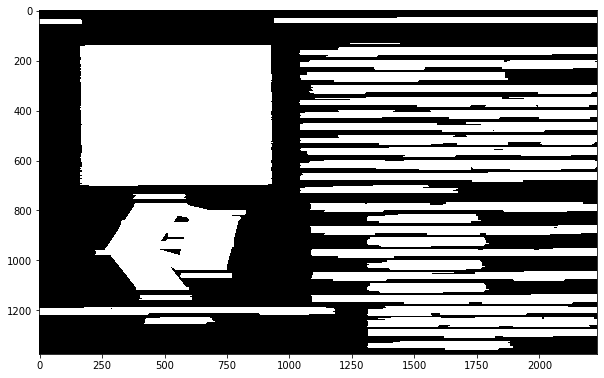

In [62]:
print_image(image_p1)

#### Etapa 02: Aplicar erosão na imagem da etapa 1 com elemento estruturante de 1 x 100

In [63]:
image_p2 = cv.erode(np.copy(image_p1),kernel1_100)

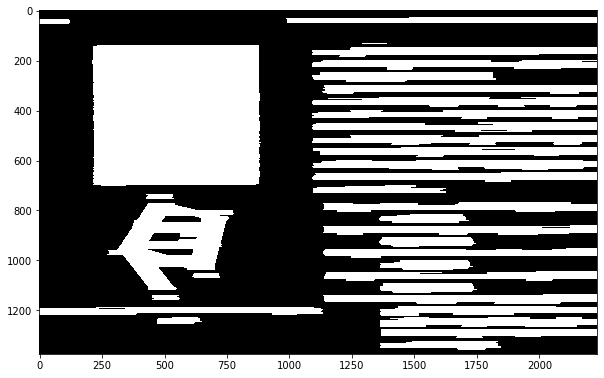

In [64]:
print_image(image_p2)

#### Etapa 03: Aplicar dilatação na imagem original com elemento estruturante de 200 x 1

In [65]:
image_p3 = cv.dilate(np.copy(image),kernel200_1, iterations=8)

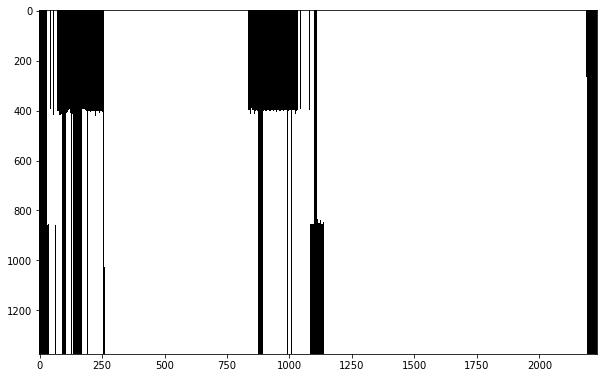

In [66]:
print_image(image_p3)

#### Etapa 04: Aplicar erosão na imagem da etapa 3 com elemento estruturante de 200 x 1

In [67]:
image_p4 = cv.erode(np.copy(image_p3),kernel200_1)

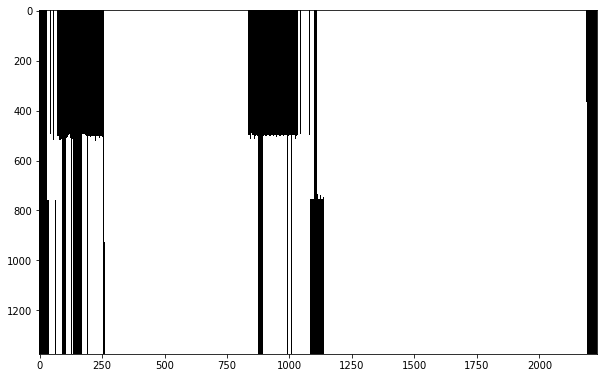

In [68]:
print_image(image_p4)

#### Etapa 05: Fazer intersecção das imagens produzidas nas etapas 2 e 4

In [69]:
image_p5 = cv.bitwise_and(image_p2, image_p4)

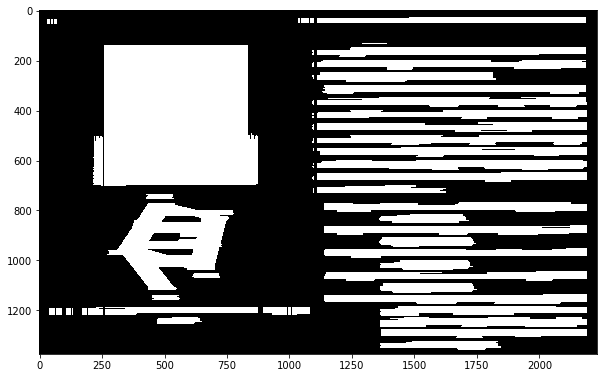

In [70]:
print_image(image_p5)

#### Etapa 06: Aplicar fechamento na imagem da etapa 5 com elemento estruturante de 1 x 30

In [71]:
image_p6 = cv.morphologyEx(image_p5, cv.MORPH_CLOSE, kernel1_30)

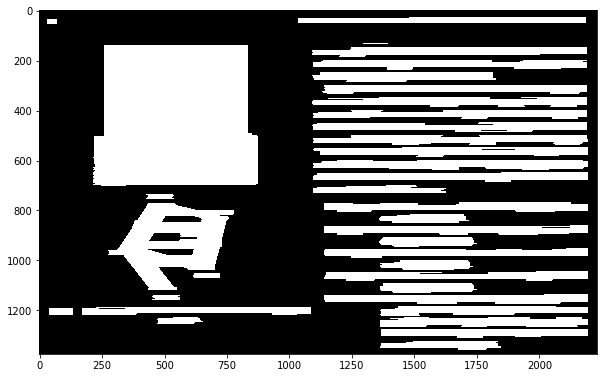

In [72]:
print_image(image_p6)

#### Etapa 07: Identificação de componentes conexos na imagem da etapa 06

In [73]:
number_of_labels, image_labels, stats, centroids = cv.connectedComponentsWithStats(image_p6)

In [74]:
print(number_of_labels)

39


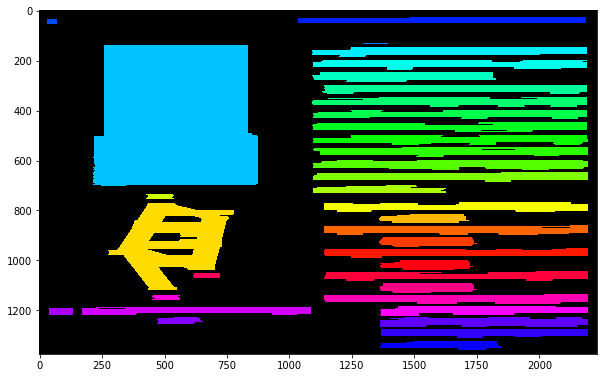

In [75]:
imshow_components(np.copy(image_labels))

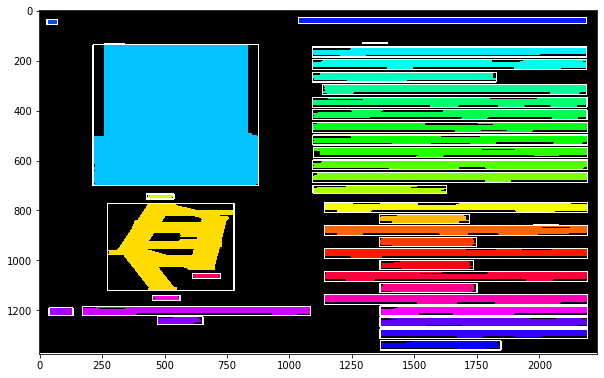

In [76]:
imshow_components_rectagles(np.copy(image_labels),stats)

#### Etapa 8: calcular razões para os componentes conexos obtidos na etapa 7

##### a) Calcular razão entre o número de pixels pretos e o número total de pixels, para cada retângulo envolvendo um componente conexo

In [77]:
black_pixels_ratios={}
black_pixels_amount = {}
component_area = {}

In [33]:
for label, stat in zip(range(number_of_labels),stats):
    black_pixels_ratios[label], black_pixels_amount[label], component_area[label] = getBlackPixelsRate(np.copy(image_p6),stat)

In [34]:
for label in black_pixels_ratios:
    print('Componente:{} | Ratio:{} | Blacks:{} | Area:{}'.format(label,black_pixels_ratios[label], black_pixels_amount[label], component_area[label]))

Componente:0 | Ratio:0.3799260268918453 | Blacks:1165667 | Area:3068142
Componente:1 | Ratio:0.8976736111111111 | Blacks:25853 | Area:28800
Componente:2 | Ratio:1.0 | Blacks:882 | Area:882
Componente:3 | Ratio:0.995049504950495 | Blacks:402 | Area:404
Componente:4 | Ratio:1.0 | Blacks:82 | Area:82
Componente:5 | Ratio:0.9104817201762246 | Blacks:339342 | Area:372706
Componente:6 | Ratio:0.735655737704918 | Blacks:32310 | Area:43920
Componente:7 | Ratio:0.7804872495446266 | Blacks:34279 | Area:43920
Componente:8 | Ratio:0.8172728539576366 | Blacks:23459 | Area:28704
Componente:9 | Ratio:0.8084920750327178 | Blacks:33360 | Area:41262
Componente:10 | Ratio:0.7510919017288444 | Blacks:33018 | Area:43960
Componente:11 | Ratio:0.7176448589392983 | Blacks:30703 | Area:42783
Componente:12 | Ratio:0.7421519563239308 | Blacks:32625 | Area:43960
Componente:13 | Ratio:0.7563636363636363 | Blacks:33280 | Area:44000
Componente:14 | Ratio:0.7650273224043715 | Blacks:33600 | Area:43920
Componente:15 |

In [35]:
np.sort(list(component_area.values()))

array([     82,     100,     404,     882,    2109,    2220,    2331,
          2976,    5673,   13320,   14174,   14356,   14782,   16554,
         17871,   28704,   28800,   31076,   31578,   32409,   33240,
         41067,   41106,   41106,   41106,   41106,   41262,   42783,
         42900,   42900,   43920,   43920,   43920,   43960,   43960,
         44000,  176245,  372706, 3068142], dtype=int32)

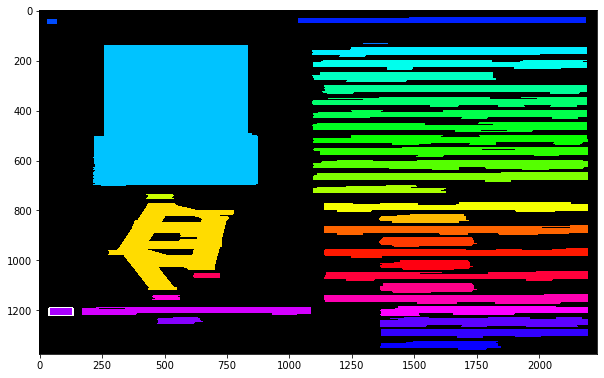

In [48]:
imshow_components_rectagles(image_labels, stats[34:35])

##### b) Razão entre o número de transições de branco para preto e o número de pixels pretos, para cada retângulo envolvendo um componente conexo

In [37]:
transition_ratios={}
hor_tran_amount = {}
ver_tran_amount = {}
total_black_amount = {}

In [38]:
for label, stat in zip(range(number_of_labels),stats):
    transition_ratios[label], hor_tran_amount[label], ver_tran_amount[label], total_black_amount[label] = getTransitionsRate(np.copy(image_p6), stat, black_pixels_amount[label])

In [39]:
for label in transition_ratios:
    print('Componente:{} | Ratio:{} | Horizontal:{}, Vertical:{} | Blacks:{}'.format(label,transition_ratios[label], hor_tran_amount[label], ver_tran_amount[label], total_black_amount[label]))

Componente:0 | Ratio:0.053648254604445354 | Horizontal:4854, Vertical:57682 | Blacks:1165667
Componente:1 | Ratio:0.05206359029899818 | Horizontal:13, Vertical:1333 | Blacks:25853
Componente:2 | Ratio:0.0 | Horizontal:0, Vertical:0 | Blacks:882
Componente:3 | Ratio:0.009950248756218905 | Horizontal:2, Vertical:2 | Blacks:402
Componente:4 | Ratio:0.0 | Horizontal:0, Vertical:0 | Blacks:82
Componente:5 | Ratio:0.007213961136552504 | Horizontal:892, Vertical:1556 | Blacks:339342
Componente:6 | Ratio:0.062116991643454036 | Horizontal:44, Vertical:1963 | Blacks:32310
Componente:7 | Ratio:0.05434814317803903 | Horizontal:83, Vertical:1780 | Blacks:34279
Componente:8 | Ratio:0.05192037171234921 | Horizontal:74, Vertical:1144 | Blacks:23459
Componente:9 | Ratio:0.04085731414868105 | Horizontal:61, Vertical:1302 | Blacks:33360
Componente:10 | Ratio:0.07356593373311528 | Horizontal:116, Vertical:2313 | Blacks:33018
Componente:11 | Ratio:0.06654072891899815 | Horizontal:63, Vertical:1980 | Blacks

In [46]:
np.sort(list(transition_ratios.values()))

array([0.        , 0.        , 0.        , 0.00303235, 0.00721396,
       0.00995025, 0.02588181, 0.028     , 0.02821289, 0.03118937,
       0.03472883, 0.03691899, 0.0391038 , 0.03950954, 0.03994873,
       0.04085731, 0.04208445, 0.04567509, 0.0466741 , 0.05192037,
       0.05193081, 0.05206359, 0.05333729, 0.05364825, 0.05434814,
       0.05553419, 0.05584071, 0.05667067, 0.06211699, 0.06231731,
       0.06535674, 0.06538526, 0.06654073, 0.06766304, 0.06908463,
       0.07020833, 0.07298084, 0.07356593, 0.07496083])

#### Etapa 9: Criar uma regra, baseada na Etapa 8, para determinar se um componente conexo é texto ou não

In [40]:
component_classes = {}

In [41]:
for comp_key in range(number_of_labels):
    if black_pixels_ratios[comp_key] < 0.53:
        component_classes[comp_key] = 0
    elif transition_ratios[comp_key] < 0.014:
        component_classes[comp_key] = 0
    else:
        component_classes[comp_key] = 1

In [42]:
# for key in component_classes:
#     print("Componente:{} | Text: {}".format(key,component_classes[key]))

In [43]:
text_labels = [key for key in component_classes if component_classes[key] == 1]
no_text_labels = [key for key in component_classes if component_classes[key] == 0]
text_stats = stats[text_labels]

text_image = np.copy(image_labels)
for l in no_text_labels:
    text_image[text_image == l] = 0

31


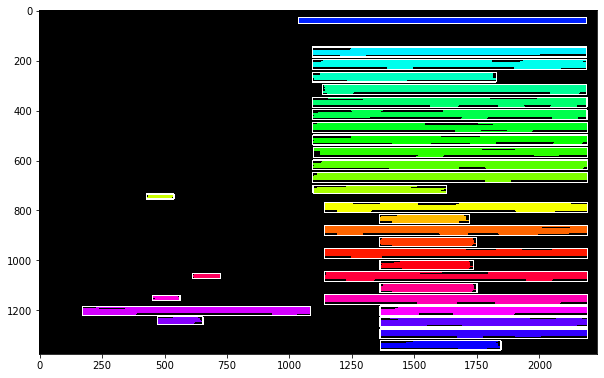

In [45]:
print(len(text_labels))
imshow_components_rectagles(text_image, text_stats)

#### Etapa 10: Segmentar palavras, colocar retângulos e calcular quantidades 

##### a) Segmentar palavras

In [38]:
np.unique(text_image)
text_image = np.uint8(text_image)
teste_i = cv.bitwise_and(image,text_image)

In [39]:
image_10 = cv.morphologyEx(text_image, cv.MORPH_OPEN, kernel1_30)

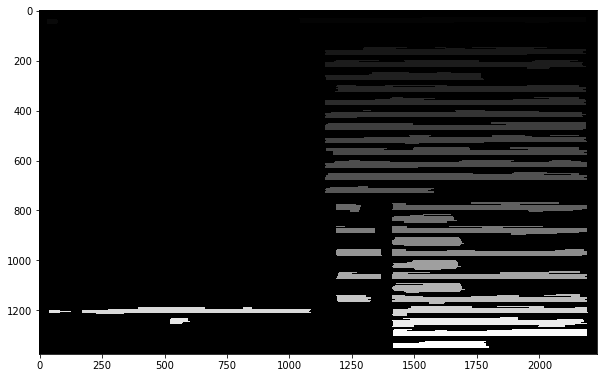

In [40]:
print_image(image_10)